# Data exploration 

---

Group name: Gruppe G (Thomas Wolpert, Sven Ritzmann)

---


## Introduction

This data shows how many people registered to vote in early 2020 vs. early 2016 in 11 states and Washington, D.C. (As far as we could tell, this data was unavailable for other states.) We have data from January through April for all 12 of the jurisdictions, and data through May for four states and Washington D.C.

## Setup

In [337]:
# Import relevant libraries
import pandas as pd
from pathlib import Path
import numpy as np
import warnings
import altair as alt
import seaborn as sns 
from vega_datasets import data

In [338]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

## Import data

In [339]:
# Create path
PARENT_PATH = str(Path().resolve().parent) + "/"
PATH = "data/"
SUBPATH = "external/"
FILE = "data"
FORMAT = ".csv"

# Import CSV file with pandas
df = pd.read_csv(PARENT_PATH + PATH + SUBPATH + FILE + FORMAT)

### Data structure

In [340]:
# Data overview
df.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [342]:
# Shape of the data
df.shape

(106, 4)

In [343]:
# Desciption of numerical features
df.describe()

,Year,New registered voters
count,106.000000,106.000000
mean,2018.000000,48223.462264
std,2.009501,48596.080089
min,2016.000000,589.000000
25%,2016.000000,19137.500000
50%,2018.000000,33301.500000
75%,2020.000000,55257.500000
max,2020.000000,238281.000000


In [ ]:
# Info on categorical variables
df.describe(include=[object, "category"])

,jurisdiction
count,106
unique,12
top,District of Columbia
freq,10


In [344]:
# column names
df.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

In [345]:
# Check for missing values
df_missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))

| Feature  | DataType   | Description |
|---|---|---|
| Jurisdiction | Categorial | Jurisdiction |
| Year	| Numerical | 	Year of data collection | 
| Month	| Categorial | 	Month of data collection | 
| New registered voters	| Numerical | New registered voters|

In [346]:
# Data overview
df.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

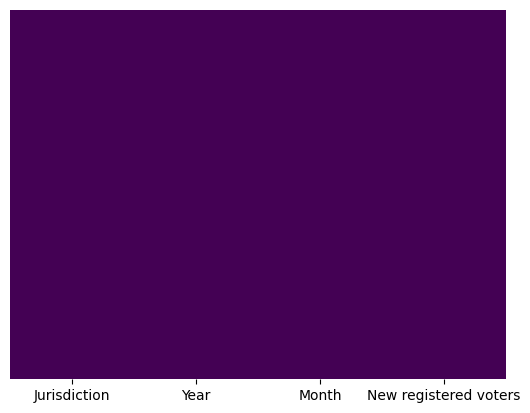

In [347]:
# show missing values (missing values - if present - will be displayed in yellow)
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

No data or column needs to be dropped because there are all values inplace


### Data corrections

In [348]:
#clean column names
df.columns = df.columns.str.replace(r"^ +| $", r"", regex=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [349]:
month_map = {
    'Jan': 1, 
    'Feb': 2, 
    'Mar': 3, 
    'Apr': 4, 
    'May': 5,
    'Jun': 6, 
    'Jul': 7, 
    'Aug': 8, 
    'Sep': 9, 
    'Oct': 10, 
    'Nov': 11, 
    'Dec': 12 
}

# apply the mapping to the 'Month' column of the dataframe
df['month'] = df['month'].replace(month_map)

Hot Encode objects

In [350]:
# Hot Encode objects educ
df_hec = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns)

In [351]:
df_hec

,year,month,new_registered_voters,jurisdiction_Arizona,jurisdiction_California,jurisdiction_Colorado,jurisdiction_Delaware,jurisdiction_District of Columbia,jurisdiction_Florida,jurisdiction_Georgia,jurisdiction_Illinois,jurisdiction_Maryland,jurisdiction_North Carolina,jurisdiction_Texas,jurisdiction_Virginia
0,2016,1,25852,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2,51155,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,3,48614,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,4,30668,1,0,0,0,0,0,0,0,0,0,0,0
4,2020,1,33229,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2020,1,25934,0,0,0,0,0,0,0,0,0,0,0,1
102,2020,2,29507,0,0,0,0,0,0,0,0,0,0,0,1
103,2020,3,31492,0,0,0,0,0,0,0,0,0,0,0,1
104,2020,4,5467,0,0,0,0,0,0,0,0,0,0,0,1


In [352]:
df_hec.columns

Index(['year', 'month', 'new_registered_voters', 'jurisdiction_Arizona',
       'jurisdiction_California', 'jurisdiction_Colorado',
       'jurisdiction_Delaware', 'jurisdiction_District of Columbia',
       'jurisdiction_Florida', 'jurisdiction_Georgia', 'jurisdiction_Illinois',
       'jurisdiction_Maryland', 'jurisdiction_North Carolina',
       'jurisdiction_Texas', 'jurisdiction_Virginia'],
      dtype='object')

## Exploratory data analysis

In [354]:
# summary statistics for all numerical columns already hot encoded
round(df_hec.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
year,106.0,2018.00,2.01,2016.0,2016.0,2018.0,2020.0,2020.0
month,106.0,2.74,1.30,1.0,2.0,3.0,4.0,5.0
new_registered_voters,106.0,48223.46,48596.08,589.0,19137.5,33301.5,55257.5,238281.0
jurisdiction_Arizona,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_California,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Colorado,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Delaware,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_District of Columbia,106.0,0.09,0.29,0.0,0.0,0.0,0.0,1.0
jurisdiction_Florida,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Georgia,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0


In [355]:
#add longitude latitute
df_map = df.copy()

In [375]:
# preperation for the map chart show jurisdication and all new_registered_voters
df_map = pd.DataFrame(df_map.groupby(["jurisdiction", "year"])["new_registered_voters"].sum().reset_index())
df_map

,jurisdiction,year,new_registered_voters
0,Arizona,2016,156289
1,Arizona,2020,126203
2,California,2016,550707
3,California,2020,605656
4,Colorado,2016,85562
5,Colorado,2020,78658
6,Delaware,2016,15578
7,Delaware,2020,9753
8,District of Columbia,2016,20371
9,District of Columbia,2020,12113


In [376]:
# add data from another dataset to visualizate it better
state_id = data.population_engineers_hurricanes()
state_id.drop(columns=["population","engineers","hurricanes"], inplace=True)
display(state_id.head())

,state,id
0,Alabama,1
1,Alaska,2
2,Arizona,4
3,Arkansas,5
4,California,6


In [389]:
# add the country id
country_id = list()
for index_map, row in df_map.iterrows():
    for index_state, state in state_id.iterrows():
        if state['state'] == row['jurisdiction']:
            country_id.append(state['id'])
            break
df_map['country_id'] = country_id

In [394]:
df_map_all = df_map.groupby(['jurisdiction', 'country_id'])['new_registered_voters'].sum().reset_index()
df_map_all

,jurisdiction,country_id,new_registered_voters
0,Arizona,4,282492
1,California,6,1156363
2,Colorado,8,164220
3,Delaware,10,25331
4,District of Columbia,11,32484
5,Florida,12,526945
6,Georgia,13,292833
7,Illinois,17,454723
8,Maryland,24,221335
9,North Carolina,37,560408


In [395]:
# show the data in a map

states = alt.topo_feature(data.us_10m.url, feature='states')

map = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300,
    title="Overview of the weighting of newly registered voters of individual states from 2016 to 2020"
)
map_points = alt.Chart(states).mark_geoshape().encode(
    color='new_registered_voters:Q',
    tooltip = ['new_registered_voters:Q', 'jurisdiction:N']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df_map_all, 'country_id', list(df_map_all.columns))
).properties(
    width=500,
    height=300,
).project(
    type='albersUsa'
)

(map + map_points).configure_title(
            fontSize=14,
            anchor='start',
            color='black'
        )


alt.LayerChart(...)

This map was used to visualize the data from each state that the dataset contains.
It is intended to provide a simple initial overview of how the distribution and weighting of each new registered voter should look like.

In [229]:
def getLineChart(df):
    runtime_Line = alt.Chart(df).mark_line().encode(
    x = alt.X(f'year', axis=alt.Axis(title="year")),
    y = alt.Y(f'sum(new_registered_voters)', axis=alt.Axis(title=(f'cout of'))),
    color = alt.value('purple')
    ).properties(
            width=100,
            height=100,
            title={
            "text": [f"new_registered_voters"]
            }
        ).interactive()

    runtime_point = alt.Chart(df).mark_circle().encode(
        x = alt.X('year'),
        y = alt.Y(f'sum(new_registered_voters)'),
        tooltip=f'sum(new_registered_voters)'
    ).interactive()
    return ((runtime_Line + runtime_point))

In [231]:
# bar chart before covid after covid
def createBarChart(df, jurisdiction):
    chart = alt.Chart(df[(df[jurisdiction] == 1)]).mark_bar().encode(
        y=alt.Y("year:N", scale=alt.Scale(domain=[2016, 2020]), title="Year"),
        x=alt.X("sum(new_registered_voters)", title="New Regsitered Voters / per Year"),
        tooltip="new_registered_voters",
        color='year:N',
        order='year'
    ).properties(
        width=400, 
        title={
            "text": [f"data for years 2016(blue) 2020(orange) for {jurisdiction}"]
            }).interactive()
    return chart


In [232]:
for i in range(3,15,1):
    display((createBarChart(df_hec, df_hec.columns[i]) + createBarChart(df_hec, df_hec.columns[i])).configure_title(
            anchor='start'
        ))

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

This map was used to show the diffrences of the years new registerd Voters from 2016 and 2020 per State.

Because of the simple dataformat the barChart was used.

In [267]:
#Slope graph for visualization (different jurisdiction)
def createChart(df, year, jurisdiction):
    colorValue="pink"
    if year == 2016:
        colorValue ="blue"
    elif year == 2020:
        colorValue = "red"
    chart = alt.Chart(df[(df['year'] == year) & (df[jurisdiction] == 1)]).mark_line().encode(
        x=alt.X("month", scale=alt.Scale(domain=[1, 5]), title="Month"),
        y=alt.X("new_registered_voters", scale=alt.Scale(domain=[1, 250000]), title="New Regsitered Voters / per Month"),
        tooltip="new_registered_voters",
        color=alt.value(colorValue),
        order='month'
    ).properties(
        width=400, 
        title={
            "text": [f"data for years 2016(blue) 2020(red) for {jurisdiction}"]
            }).interactive()
    return chart


for i in range(3,15,1):
    display((createChart(df_hec, 2016, df_hec.columns[i]) + createChart(df_hec, 2020, df_hec.columns[i])).configure_title(
            anchor='start'
        ).configure_title(
            fontSize=14,
            anchor='start',
            color='black'
        ))

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

This map was used to show the diffrences of the years new registerd Voters from 2016 and 2020 per State.

Here it shows not only the sum of the differences but the specific month - thats why the lineGraph was the best choise

In [242]:
# Create correlation matrix for numerical variables
corr_matrix = df_hec.corr()
corr_matrix

,year,month,new_registered_voters,jurisdiction_Arizona,jurisdiction_California,jurisdiction_Colorado,jurisdiction_Delaware,jurisdiction_District of Columbia,jurisdiction_Florida,jurisdiction_Georgia,jurisdiction_Illinois,jurisdiction_Maryland,jurisdiction_North Carolina,jurisdiction_Texas,jurisdiction_Virginia
year,1.000000e+00,1.333361e-14,-0.077162,-3.339343e-14,-5.526829e-15,-3.346182e-14,-2.143474e-14,-2.542212e-14,-3.077350e-14,-1.463462e-14,5.761760e-15,4.104141e-14,4.227584e-14,3.418849e-14,2.856550e-14
month,1.333361e-14,1.000000e+00,-0.158835,-5.220583e-02,-5.220583e-02,-5.220583e-02,-5.220583e-02,6.604949e-02,-5.220583e-02,-5.220583e-02,-5.220583e-02,6.604949e-02,6.604949e-02,6.604949e-02,6.604949e-02
new_registered_voters,-7.716212e-02,-1.588351e-01,1.000000,-7.627483e-02,5.690024e-01,-1.636083e-01,-2.661657e-01,-3.001188e-01,1.042323e-01,-6.863891e-02,5.090269e-02,-1.740984e-01,5.216513e-02,4.429983e-01,-1.560033e-01
jurisdiction_Arizona,-3.339343e-14,-5.220583e-02,-0.076275,1.000000e+00,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_California,-5.526829e-15,-5.220583e-02,0.569002,-8.163265e-02,1.000000e+00,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Colorado,-3.346182e-14,-5.220583e-02,-0.163608,-8.163265e-02,-8.163265e-02,1.000000e+00,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Delaware,-2.143474e-14,-5.220583e-02,-0.266166,-8.163265e-02,-8.163265e-02,-8.163265e-02,1.000000e+00,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_District of Columbia,-2.542212e-14,6.604949e-02,-0.300119,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,1.000000e+00,-9.221389e-02,-9.221389e-02,-9.221389e-02,-1.041667e-01,-1.041667e-01,-1.041667e-01,-1.041667e-01
jurisdiction_Florida,-3.077350e-14,-5.220583e-02,0.104232,-8.163265e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,1.000000e+00,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Georgia,-1.463462e-14,-5.220583e-02,-0.068639,-8.163265e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,1.000000e+00,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02


In [243]:
# Correlation Heatmap
cor_data = (corr_matrix.round(2).stack()
              .reset_index() 
              .rename(columns={0: 'correlation', 'level_0': 'variableOne', 'level_1': 'variableTwo'}))
              
cor_data['correlation'] = cor_data['correlation'].round(2)

cor_plot = alt.Chart(cor_data).mark_rect().encode(
    x='variableOne:O',
    y='variableTwo:O',
    tooltip='correlation'
).properties(
    title='Correlation Heatmap'
)

text = cor_plot.mark_text(size=7).encode(
    text='correlation',
    color=alt.condition(
        alt.datum.correlation > 0.3, 
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = cor_plot.mark_rect().encode(
    color='correlation:Q'
)

(cor_plot + text).configure_title(
        anchor='start'
    ).interactive()

alt.LayerChart(...)

The Heatmap was the best choise because of the mass on data values 
- it gives a quick overview and shows the interesting values with a diffrent color
- Texas / Californien -> population strongest -> can affect the outcome from the covid article 